In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [131]:
def plot_data(x, y, T):
    '''
    Plot latent and observed data.
    ---
    >> x: latent data (list of float)
    >> y: observed data (list of float)
    >> T: number of steps (int)
    '''
    plt.style.use('ggplot')

    plt.figure(figsize=(10,5))
    plt.plot(np.array(range(0,T+1)), np.array(x), label='Latent data (X)')
    plt.plot(np.array(range(1,T+1)), np.array(y), label='Observed data (Y)')
    plt.xlabel('t')
    plt.legend()
    plt.title('Generated data')

def generate_data(T, A=1, B=1, C=1, D=1,seed=None, plot=True):
    '''
    Generate data according to a gaussian linear state space model.
    ---
    >> T: number of steps (int)
    >> A, B, C, D: model parameters (np.array)
    >> plot: boolean indicating if it is desired to plot the data (bool)
    '''
    if seed != None:
        # Use specified random seed
        np.random.seed(seed)

    # Generate initial latent data
    x_0 = np.random.normal(0,1)

    latent = [x_0]
    obs = []

    # Generate dataset
    for t in range(T):
        v_t = np.random.normal(0,1)
        w_t = np.random.normal(0,1)
        
        x_t = A * latent[-1] + B * v_t
        y_t = C * x_t + D * w_t
    
        latent.append(x_t)
        obs.append(y_t)

    # If desired, plot the data
    if plot:
        plot_data(latent, obs, T)

    # Return both latent and observed variables
    return latent, obs

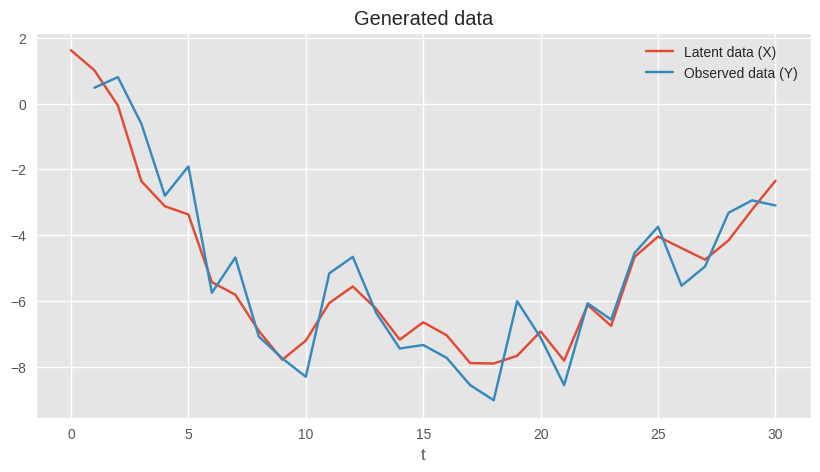

In [132]:
# Example
_, _ = generate_data(30, seed=1, plot=True)

In [133]:
T = 100

X = {}
Y = {}

X[0], Y[0] = generate_data(T, A = 0.95, seed = 100, plot = False)
X[1], Y[1] = generate_data(T, A = 0.5, seed = 123, plot = False)
X[2], Y[2] = generate_data(T, A = 0.75, C = 0.5, seed = 666, plot = False)

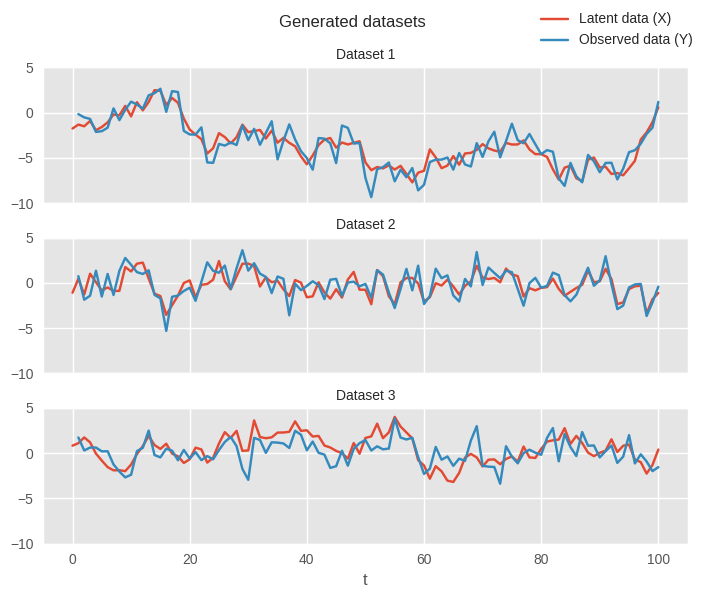

In [134]:
plt.style.use('ggplot')

fig, ax = plt.subplots(3,1,figsize=(7,6),sharex=True, sharey=True)
for i in range(3):
    ax[i].plot(np.array(range(0,T+1)), np.array(X[i]))#, label='')
    ax[i].plot(np.array(range(1,T+1)), np.array(Y[i]))#, label='')
    ax[i].set_title(f'Dataset {i+1}',size=10)
ax[-1].set_xlabel('t')
fig.legend(labels= ['Latent data (X)','Observed data (Y)'])
fig.suptitle('Generated datasets',size=12)
plt.tight_layout()
plt.ylim(-10, 5)

plt.savefig('./figs/generated_data.png')

In [140]:
# Saving generated data
for i in range(3): 
    # Latent
    x_str =  "x,"
    for j in X[i]:
        x_str += f"{j},"
    x_str = x_str.strip(',')

    # Observed
    y_str =  "y,"
    for j in Y[i]:
        y_str += f"{j},"
    y_str = y_str.strip(',')

    with open(f"./data/gaussian_ssm_data{i+1}.txt", "w") as f:
        f.write(f"{x_str}\n{y_str}")